# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: viernes 8 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import random
import statistics as stats

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [6]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [11]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        #dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [13]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 100, 69.07044451459723, 130.92955548540277]
[117.9089660324627, 100, 69.07044451459723, 113.02058945294007]
[138.28598563897512, 100, 48.69342490808481, 113.02058945294007]
[214.15950118909694, 24.126484449878177, 48.69342490808481, 113.02058945294007]
[196.71754845779648, 24.126484449878177, 48.69342490808481, 130.46254218424056]
[324.1121402520857, 24.126484449878177, 48.69342490808481, 3.0679503899513634]
[324.1121402520857, 7.406414001022508, 48.69342490808481, 19.788020838807032]
[100.44752138131392, 7.406414001022508, 48.69342490808481, 243.4526397095788]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [16]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.9   54   74  100  125  146
 20,000 0.49  95.3    1   11   72  226  445
 40,000 0.50 101.3    1   10   68  230  479
 60,000 0.50 101.5    1   10   70  227  473
 80,000 0.51 102.7    1   10   68  234  466
100,000 0.51 102.9    1   10   68  233  480
120,000 0.50  99.4    1   11   70  231  451
140,000 0.51 103.8    1   10   68  235  464
160,000 0.50  99.9    1   10   69  234  458
180,000 0.50 101.2    1   11   69  233  472
200,000 0.50  99.7    1   10   71  231  440


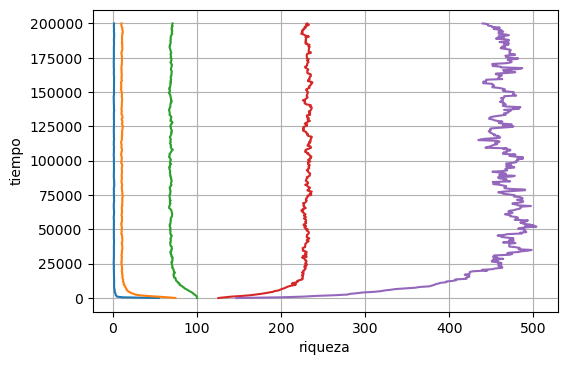

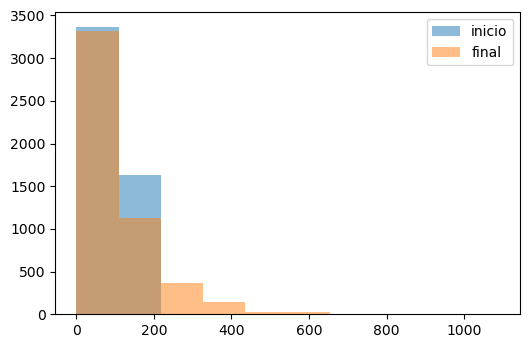

In [17]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

### Respuesta Parte I

### 1. a)

In [18]:
# Funciones utilizadas para normalizar la distribución 
# extraidas de https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb
def samples(distribution, *args, n=N, mu=MU):
    "Sample from the distribution n times, then normalize results to have mean mu."
    numbers = [distribution(*args) for _ in range(N)]
    return normalize(numbers, mu)

def normalize(numbers, mu):
    "Make the numbers non-negative, and scale them so they have mean mu."
    numbers = [max(0, n) for n in numbers]
    factor = len(numbers) * mu / sum(numbers)
    return [x * factor for x in numbers]

Como nueva distribución inicial del dinero se propone una distribución gamma con parámetros alpha = 0.5 y beta = 0.2.

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.64 140.9    0    2   47  271  660
 20,000 0.51 103.6    1   11   68  231  477
 40,000 0.50  99.5    1   11   69  231  463
 60,000 0.50 100.9    1   10   68  234  459
 80,000 0.50  98.4    1   10   72  226  432
100,000 0.50  99.3    1   10   68  234  445
120,000 0.50 100.0    1   11   69  231  465
140,000 0.50  98.7    1   11   70  230  443
160,000 0.50  98.1    1   11   71  229  449
180,000 0.50 100.6    1   11   70  231  479
200,000 0.50 100.2    1   11   68  230  465


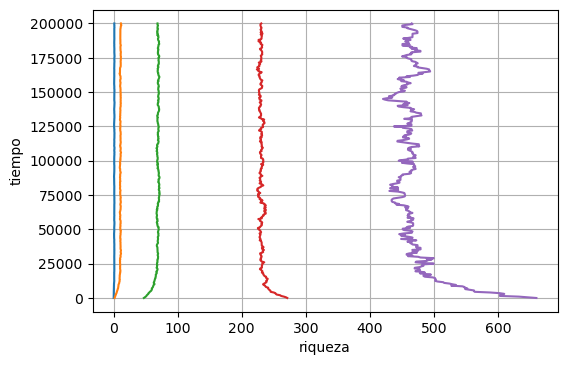

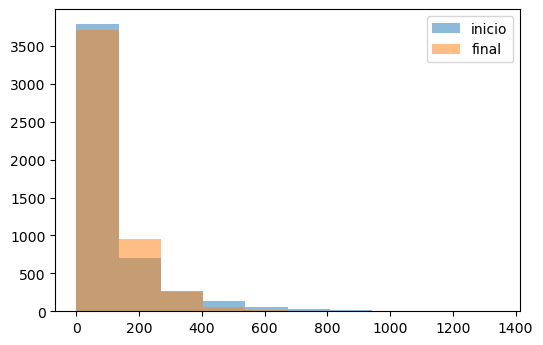

In [19]:
def gamma(): return random.gammavariate(0.5,0.2)
show(samples(gamma))

### 1. b)

La función de transacción propuesta consiste en dividir el pozo en tres partes iguales, donde una persona elegida de manera aleatoria se queda con 1/3 del total y la otra con 2/3 del total buscando que la transacción sea un poco más equitativa.

In [9]:
def transaccion_modif(A, B):
    pozo = A + B
    C = [pozo/3, 2*pozo/3]
    random.shuffle(C)
    return C

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.63 135.6    0    2   47  271  607
 20,000 0.30  56.1   26   43   86  175  275
 40,000 0.28  50.7   30   46   88  174  251
 60,000 0.28  50.3   29   45   89  174  244
 80,000 0.27  49.8   29   45   89  171  241
100,000 0.28  50.3   29   45   89  173  249
120,000 0.28  50.4   30   45   89  171  249
140,000 0.28  50.4   30   46   88  172  248
160,000 0.27  49.9   30   46   89  170  245
180,000 0.27  49.6   31   46   89  173  246
200,000 0.27  49.7   30   46   88  171  249


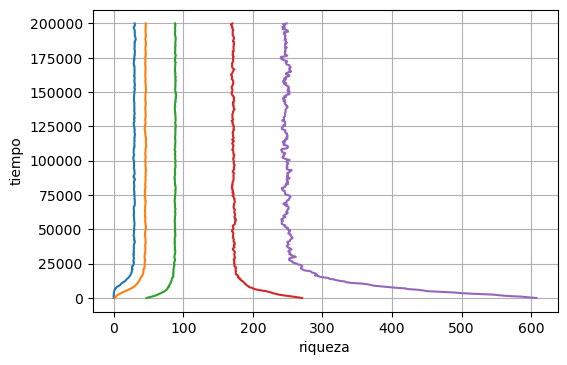

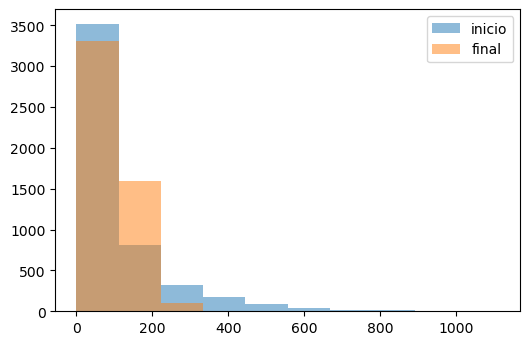

In [50]:
res = show(samples(gamma))

En principio se observa que al utilizar la función de transacción modificada hay una baja notoria en el coeficiente de Gini alcanzando un valor de 0.27, lo que indica que la distribución de riquezas es mucho más equitativa que en la simulación con la función de transacción original, además la desviación estándar también disminuye, lo que significa una menor variabilidad en las riquezas y por ende una distribución menos desigual.

Otro factor que podría afectar el resultado de la simulación es la función de interacción que define cómo son seleccionadas las personas para realizar una transacción. Si hubiera un sesgo en la selección y no fuera aleatorio es probable que la distribución de riquezas se vuelva desigual. 

### 2

A: el coef de gini de la población se encuentra entre 0.2 y 0.5
B: la desviación estándar de la población es mayor 70
C: la mediana de la población es menor o igual a 50

In [52]:
def simula_A(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(gini(dinerop) >= 0.2 and gini(dinerop) <= 0.5):
            cont+=1
    print(cont/T)    

In [37]:
# Simulación evento A
dinerop = samples(gamma)
simula_A(dinerop, 20000)

0.79985


In [51]:
def simula_B(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(stats.stdev(dinerop) > 70):
            cont+=1
    print(cont/T)   

In [40]:
# Simulación evento B
dinerop = samples(gamma)
simula_B(dinerop, 20000)

0.5363


In [50]:
def simula_C(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if(stats.median(dinerop) <= 50):
            cont+=1
    print(cont/T)  

In [42]:
# Simulación evento C
dinerop = samples(gamma)
simula_C(dinerop, 20000)

0.03495


### 2 (b) P(A $\cup$ B)

In [49]:
def simula_AuB(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont = 0;
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if((gini(dinerop) >= 0.2 and gini(dinerop) <= 0.5) or (stats.stdev(dinerop) > 70)):
            cont+=1
    print(cont/T)  

In [48]:
dinerop = samples(gamma)
simula_AuB(dinerop, 20000)

1.0


### 2. (c) P(A $\mid$ C) 

In [54]:
def simula_AcondC(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones" 
    cont1 = 0;
    cont2 = 0
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion_modif(dinerop[i], dinerop[j])
        if((gini(dinerop) >= 0.2 and gini(dinerop) <= 0.5) and (stats.median(dinerop) <= 50)):
            cont1+=1
        if(stats.median(dinerop) <= 50):
            cont2+=1
    # Se calcula la probabilidad de A y C
    p1 = cont1/T
    # Se calcula la probabilidad de C
    p2 = cont2/T
    print(p1/p2) 

In [55]:
dinerop = samples(gamma)
simula_AcondC(dinerop, 20000)

0.0


## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
